In [88]:
# IMPORT LIBRARIES
# ====================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans


In [89]:
# STEP 2: LOAD Dataset
# ====================================
df = pd.read_csv("Bagmati_students_data_updated.csv")

df.head()

,student_id,school_id,school_type,gender,marriage_status,physical_disability,district,area_type,wealth_level,age,distance_to_school,library_access,internet_access,attendance_rate,academic_score,class_repetition,education_level,dropout
0,STU-006253,SCH-011,Private,Female,Single,0,Sindhuli,Urban,Second,8,0.97,1,1,85%,2.8,0,Primary,0
1,STU-004522,SCH-469,Public,Male,Single,0,Sindhuli,Rural,Fourth,6,0.86,0,0,40%,1.6,1,Primary,1
2,STU-000577,SCH-288,Public,Male,Single,0,Chitwan,Rural,Middle,5,1.94,0,1,73%,2.4,2,Primary,1
3,STU-005203,SCH-223,Public,Female,Single,0,Kathmandu,Urban,Fourth,11,3.22,0,1,59%,3.2,0,Lower Secondary,0
4,STU-002751,SCH-256,Private,Female,Single,0,Chitwan,Rural,Fourth,11,2.76,1,1,54%,2.0,0,Lower Secondary,1


In [90]:
# STEP 3: Clean and Preprocess Data
# ====================================

# Check for missing values in each column
print(df.isnull().sum())

eda_df = df.copy()  # Save clean copy for EDA

# Remove unneeded ID columns
df = df.drop(columns=["student_id", "school_id"])

# Convert attendance from percentage string to number
df['attendance_rate'] = df['attendance_rate'].str.replace('%', '').astype(float) / 100

# Convert binary text columns
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['marriage_status'] = df['marriage_status'].map({'Single': 0, 'Married': 1})
df['area_type'] = df['area_type'].map({'Rural': 0, 'Urban': 1})
df['school_type'] = df['school_type'].map({'Public': 0, 'Private': 1})
df['wealth_level'] = df['wealth_level'].map({'Poorest': 0, 'Second': 1, 'Middle': 2, 'Fourth': 3, 'Richest': 4})
df['education_level'] = df['education_level'].map({'Primary': 0, 'Lower Secondary': 1, 'Upper Secondary': 2})

df.head()


student_id             0
school_id              0
school_type            0
gender                 0
marriage_status        0
physical_disability    0
district               0
area_type              0
wealth_level           0
age                    0
distance_to_school     0
library_access         0
internet_access        0
attendance_rate        0
academic_score         0
class_repetition       0
education_level        0
dropout                0
dtype: int64


,school_type,gender,marriage_status,physical_disability,district,area_type,wealth_level,age,distance_to_school,library_access,internet_access,attendance_rate,academic_score,class_repetition,education_level,dropout
0,1,0,0,0,Sindhuli,1,1,8,0.97,1,1,0.85,2.8,0,0,0
1,0,1,0,0,Sindhuli,0,3,6,0.86,0,0,0.40,1.6,1,0,1
2,0,1,0,0,Chitwan,0,2,5,1.94,0,1,0.73,2.4,2,0,1
3,0,0,0,0,Kathmandu,1,3,11,3.22,0,1,0.59,3.2,0,1,0
4,1,0,0,0,Chitwan,0,3,11,2.76,1,1,0.54,2.0,0,1,1


dropout
1    2410
0    2394
Name: count, dtype: int64


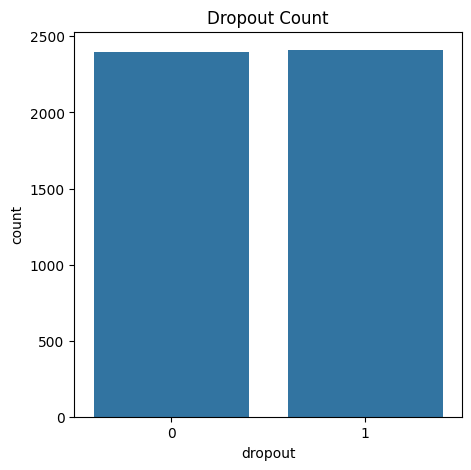

In [91]:
# STEP 4: EDA (Exploratory Data Analysis)
# ====================================

# Balance check
print(df['dropout'].value_counts())

# a. Plot class distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='dropout', data=df)
plt.title("Dropout Count")
plt.show()

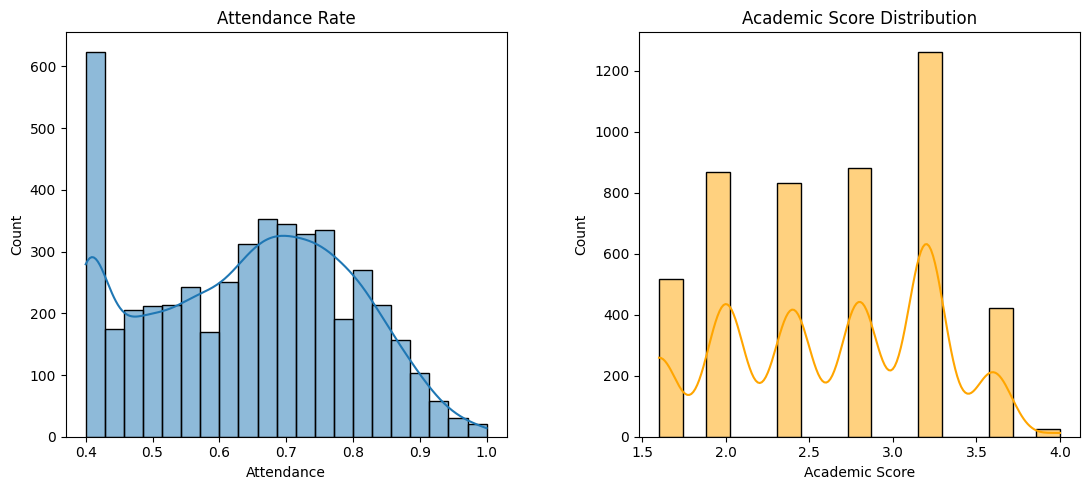

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

# a. Attendance Rate Histogram
sns.histplot(df['attendance_rate'], kde=True, ax=ax[0])
ax[0].set_title("Attendance Rate")
ax[0].set_xlabel("Attendance")
ax[0].set_ylabel("Count")

# b. Academic Score Histogram
sns.histplot(df['academic_score'], color='orange', kde=True, ax=ax[1])
ax[1].set_title("Academic Score Distribution")
ax[1].set_xlabel("Academic Score")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

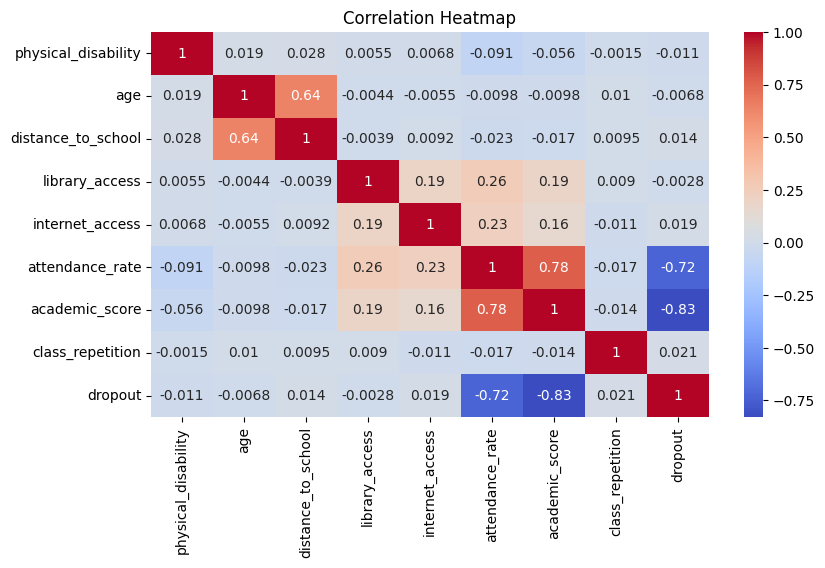

In [93]:
# c. Correlation with dropout risk

heatmap_data = df[[
    'physical_disability', 'age', 'distance_to_school','library_access', 'internet_access', 'attendance_rate',
    'academic_score', 'class_repetition', 'dropout']]

# Plot correlation heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

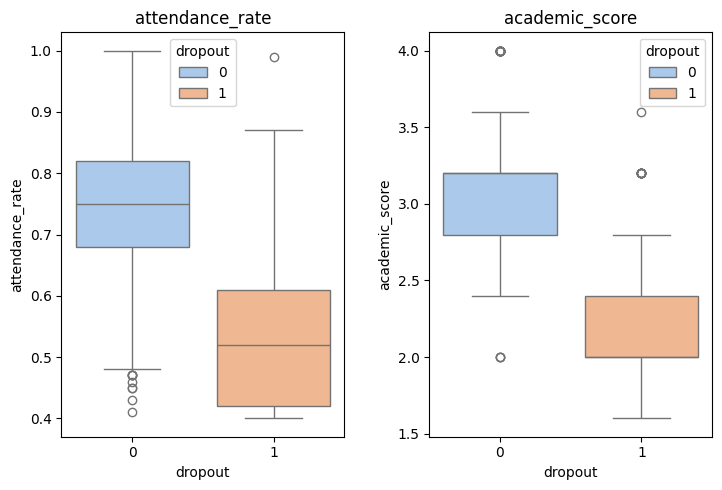

In [94]:
# d. Boxplots for selected features
plt.figure(figsize=(11, 5))
selected_features = ['attendance_rate', 'academic_score']
for i, col in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='dropout', hue='dropout', y=col, data=df, palette='pastel')
    plt.title(col)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

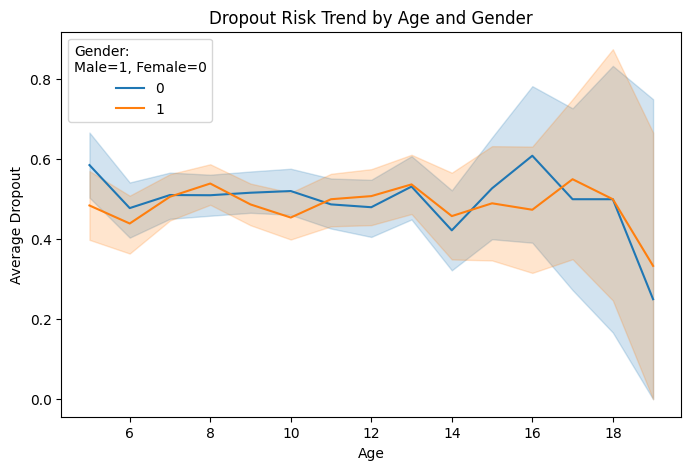

In [95]:

plt.figure(figsize=(8, 5))
sns.lineplot(x='age', y='dropout', hue='gender', data=df)
plt.title("Dropout Risk Trend by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Average Dropout")
plt.legend(title='Gender:\nMale=1, Female=0')
plt.show()


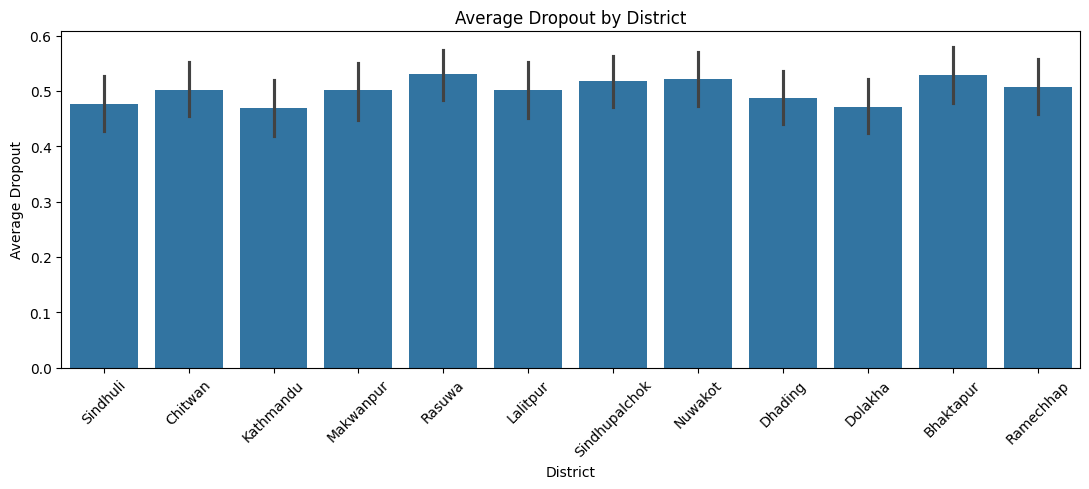

In [96]:
# f. Regional Comparison: Plotting average dropout for each district

plt.figure(figsize=(11, 5))
sns.barplot(x='district', y='dropout',data=eda_df, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title("Average Dropout by District")
plt.ylabel("Average Dropout")
plt.xlabel("District")
plt.tight_layout()
plt.show()

In [97]:
# Separate features (X) and target (y)
X = df.drop(columns=["dropout","district"])
y = df["dropout"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [98]:
# -------------------- Model 1: Logistic Regression --------------------

# Train model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled, y_train)

# Predict
y_pred1 = model1.predict(X_test_scaled)

# Evaluate Model 1
print(" Model 1 (Logistic Regression) Accuracy:", accuracy_score(y_test, y_pred1))
print("\n Classification Report – Model 1:\n", classification_report(y_test, y_pred1))


 Model 1 (Logistic Regression) Accuracy: 0.9760665972944849

 Classification Report – Model 1:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       459
           1       0.98      0.97      0.98       502

    accuracy                           0.98       961
   macro avg       0.98      0.98      0.98       961
weighted avg       0.98      0.98      0.98       961



In [99]:
# -------------------- Model 2: Decision Tree --------------------

# Train model
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

# Predict
y_pred2 = model2.predict(X_test)

# Evaluate Model 2
print("\n Model 2 (Decision Tree) Accuracy:", accuracy_score(y_test, y_pred2))
print("\n Classification Report – Model 2:\n", classification_report(y_test, y_pred2))



 Model 2 (Decision Tree) Accuracy: 0.9604578563995838

 Classification Report – Model 2:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       459
           1       0.97      0.96      0.96       502

    accuracy                           0.96       961
   macro avg       0.96      0.96      0.96       961
weighted avg       0.96      0.96      0.96       961



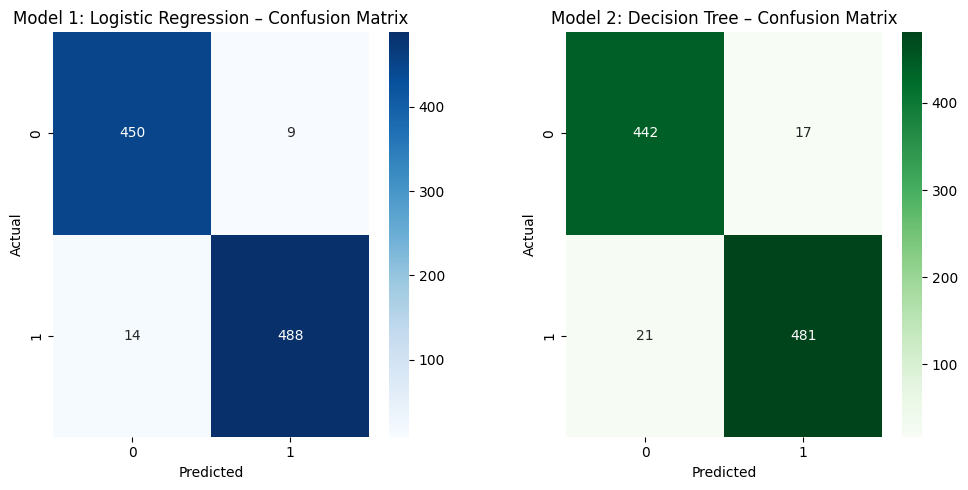

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Model 1: Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Model 1: Logistic Regression – Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# Model 2: Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Model 2: Decision Tree – Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.subplots_adjust(wspace=1.2)  # Adjust space between plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


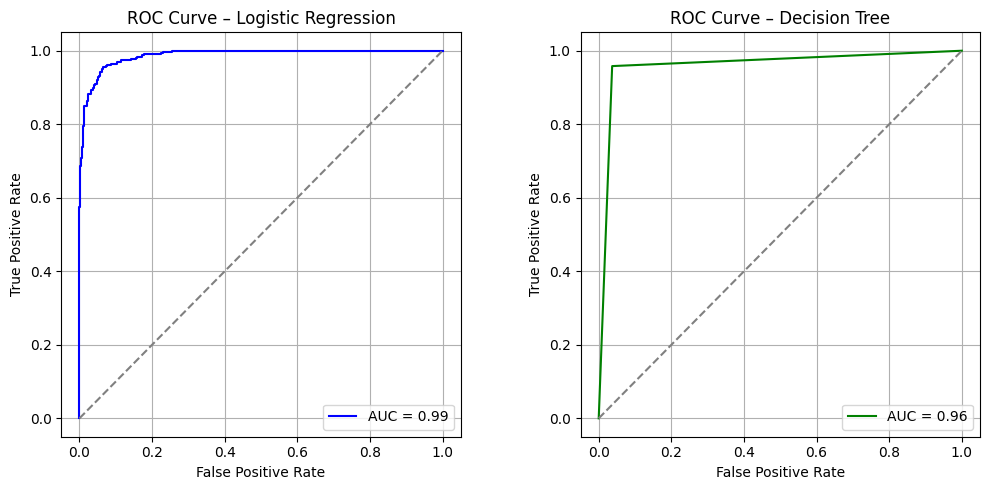

In [101]:
# Get predicted probabilities (for positive class)
y_proba1 = model1.predict_proba(X_test)[:, 1]
y_proba2 = model2.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr1, tpr1, _ = roc_curve(y_test, y_proba1)
fpr2, tpr2, _ = roc_curve(y_test, y_proba2)
auc1 = roc_auc_score(y_test, y_proba1)
auc2 = roc_auc_score(y_test, y_proba2)

# Plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Model 1: Logistic Regression
ax[0].plot(fpr1, tpr1, label=f"AUC = {auc1:.2f}", color="blue")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[0].set_title("ROC Curve – Logistic Regression")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()
ax[0].grid()

# Model 2: Decision Tree
ax[1].plot(fpr2, tpr2, label=f"AUC = {auc2:.2f}", color="green")
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_title("ROC Curve – Decision Tree")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

<Axes: title={'center': 'Feature Importance – Logistic Regression'}>

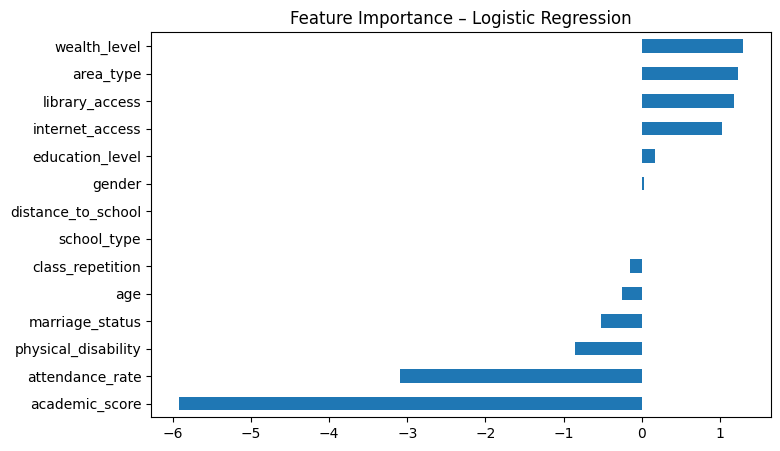

In [102]:

feature_importance = pd.Series(model1.coef_[0], index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8,5), title="Feature Importance – Logistic Regression")


In [103]:
 # STEP 5: CLUSTERING MODEL (K-Means)
 # ====================================

 # Select features for clustering
 clustering_features = ['attendance_rate', 'academic_score', 'distance_to_school', 'class_repetition']
 X_cluster = df[clustering_features]


 # Standardize clustering features
 scaler_cluster = StandardScaler()
 X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

 # Run KMeans
 kmeans = KMeans(n_clusters=3, random_state=42)
 df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

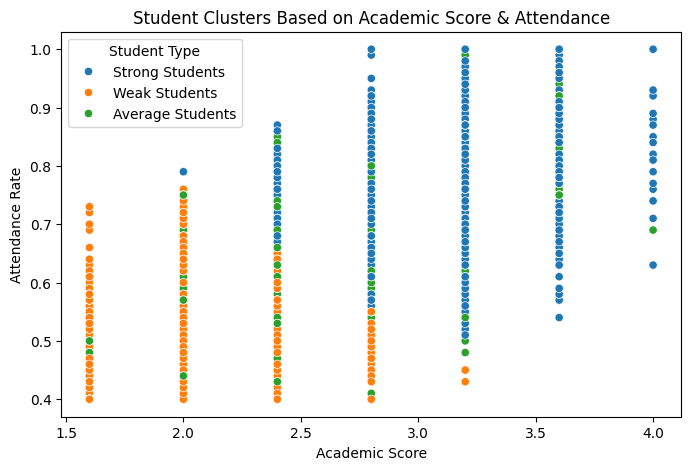

In [104]:
# Cluster labels
cluster_labels = {
    0: 'Weak Students',
    1: 'Strong Students',
    2: 'Average Students'
}

# Map labels
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='academic_score',  y='attendance_rate', hue='cluster_label'  )
plt.title("Student Clusters Based on Academic Score & Attendance")
plt.xlabel("Academic Score")
plt.ylabel("Attendance Rate")
plt.legend(title='Student Type')
plt.show()

In [105]:
# Show average stats by cluster
print("Cluster Group Summary:\n")
print(df.groupby('cluster')[clustering_features + ['dropout']].mean())

Cluster Group Summary:

         attendance_rate  academic_score  distance_to_school  \
cluster                                                        
0               0.494324        2.027379            1.425042   
1               0.752632        3.098507            1.227291   
2               0.663756        2.739196            3.983882   

         class_repetition   dropout  
cluster                              
0                0.255426  0.972732  
1                0.196291  0.137494  
2                0.280151  0.449749  
